***
**Tutorial 2 for Chapter 3**

Case study 11: Mining business areas based on operator base station datasets by hierachical clustering
***
<font color = 'darkred'>*Reference:*
<font color = 'darkred'>*数据挖掘原理与应用*

<!-- Acknowledgement:  
**i2DM (Tan, Steinbach, Kumar (2018) Introduction to Data Mining , 2nd Ed, Pearson )** Pearson Press   --> 
For the tutorial course of AMA546 Statistical Data Mining   
Lecturer: Mr. Qiuyi Huang
PolyU, HKSAR

***Contents*** 
1. Objectives of the analysis
2. Description of the data
3. Exploratory data analysis
4. Data preprocessing
5. Hierachical clustering
6. Summary report
  - 6.1 Objectives
  - 6.2 Organisation of the data
  - 6.3 Exploratory data analysis:
  - 6.4 Model specification

# Objectives of the analysis

Operator base station can collect imfomation including ‘Base station ID', 'Average stay length during working hours on weekdays', 'Average stay length in early morning','Average stay length on weekends', 'Average daily footfall' near each base station.

There is a 431 $\times$ 5 table in **'Hierachy.csv'** shows this information.

We aim to cluster this dataset and divide these base stations into different business areas.

# Description of the data 

In [17]:
import pandas as pd 
from sklearn.preprocessing import scale
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [18]:
data = pd.read_csv(
    '/Users/qiuyi/Desktop/科研归档/RA_May23_Apr24/0831 SDM_整理/2_ama546_2023spring/AMA546_Tutorial/T2_Ch3/TUT_clustering/Hierarchical/Hierachy.csv',
    encoding = 'utf8', engine='python'
)

In [19]:
data.head()

,Base station ID,Average stay length during working hours on weekdays,Average stay length in early morning,Average stay length on weekends,Average daily footfall
0,36902,78,521,602,2863
1,36903,144,600,521,2245
2,36904,95,457,468,1283
3,36905,69,596,695,1054
4,36906,190,527,691,2051


In [20]:
# fcolums = ['Base station ID', 'Average stay length during working hours on weekdays',
#              'Average stay length in early morning','Average stay length on weekends', 'Average daily footfall']
# data.columns = fcolums
# data.head()

In [21]:
data.dtypes

Base station ID                                         int64
Average stay length during working hours on weekdays    int64
Average stay length in early morning                    int64
Average stay length on weekends                         int64
Average daily footfall                                  int64
dtype: object

In [22]:
data.shape

(431, 5)

## Exploratory data analysis

In [23]:
data.describe()

,Base station ID,Average stay length during working hours on weekdays,Average stay length in early morning,Average stay length on weekends,Average daily footfall
count,431.000000,431.000000,431.000000,431.000000,431.000000
mean,36977.515081,194.109049,218.241299,288.946636,5375.433875
std,1156.990679,140.076490,201.200426,199.834477,3423.142810
min,35038.000000,35.000000,50.000000,50.000000,811.000000
25%,35980.000000,84.500000,69.500000,126.500000,2353.000000
50%,36940.000000,117.000000,91.000000,194.000000,4750.000000
75%,37967.000000,362.500000,439.500000,473.500000,7726.500000
max,38999.000000,449.000000,600.000000,699.000000,12942.000000


We want to reduce dimensions by PCA, but we need to scale data before implementing PCA. Exploring the relationships among variables also needs scaling data.

In [24]:
from sklearn.preprocessing import scale

In [25]:
fcolums_short = ['ID', 'Ave_WH',
             'Ave_M','Ave_Wks', 'Ave_DF']
scaleData = pd.DataFrame(
    scale(data), columns=fcolums_short
)

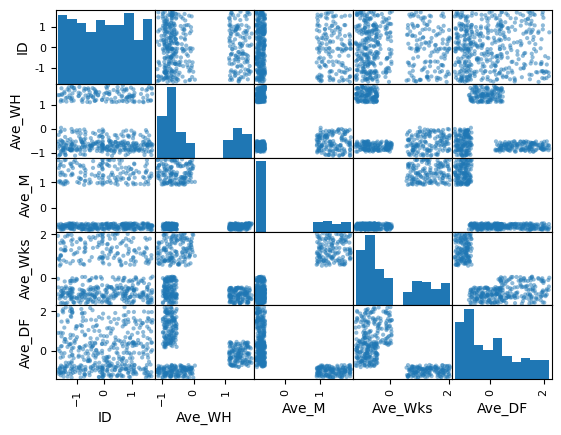

In [26]:
# Draw the scatter plot
axes = scatter_matrix(scaleData, diagonal='hist')

The scatter plot above indicates that four features do not have a linear relationship, so there is no need to remove collinear features.

## Data preprocessing

In [27]:
from sklearn.decomposition import PCA

Use PCA to reduce the dimensionality of our dataset by transforming the original 4 features into 2 principal components. 

In [28]:
pca2 = PCA(n_components= 2) # reduce to 2 features
data_pca2 = pd.DataFrame(
    pca2.fit_transform(scaleData)
)

Visualize the reduced dimensional features obtained from PCA by creating a scatter plot

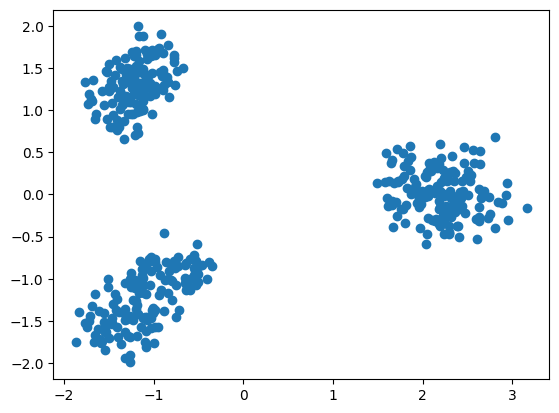

In [29]:
plt.scatter(
    data_pca2[0], 
    data_pca2[1]
)

We can clearly see that there are three clusters, so we need to tune the k to 3.

# Hierachical clustering

In sklearn module, we implement hirechical clustering by AgglomerativeClustering function.

In [30]:
from sklearn.cluster import AgglomerativeClustering

Set the value of k to 3 and assign a unique color to each cluster.

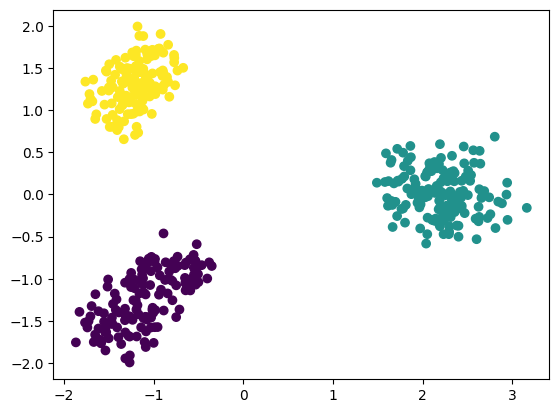

In [31]:
agglomerativeClustering = AgglomerativeClustering(n_clusters=3) # We set 3 clusters
pTarget = agglomerativeClustering.fit_predict(scaleData) #fit
 
plt.figure()
plt.scatter(
    data_pca2[0], 
    data_pca2[1], 
    c=pTarget
)

From the scatter plot, it is evident that the data points belonging to each cluster are well-separated.

Next, we want to draw a hierarchical tree.

In [32]:
import scipy.cluster.hierarchy as hcluster

**Recall the distance methods (slides p30-):** </br>

Assume $d(s,t)$ is the distance between two clusters $s$ and $t$. </br>

The algorithm begins with a forest of clusters that have yet to be used in the hierarchy being formed. When two clusters $s$ and $t$ from this forest are combined into a single cluster $u$, $s$ and $t$ are removed from the forest, and $u$ is added to the forest. When only one cluster remains in the forest, the algorithm stops, and this cluster becomes the root. </br>

Suppose cardinality $|u|$ is the number of original observations in cluster , i.e. $u[0],...,u[|u|-1]$, so does $|v|$. $s$ and $t$ are combined to form cluster $u$, and let $v$ be any remaining cluster in the forest that is not $u$.

- Single link (MIN) </br>
$d(u,v) = min (dist(u[i],v[j]))$</br>
for all points $i$ in cluster $u$ and $j$ in cluster $v$.</br>
- Complete link (MAX)</br>
$d(u,v) = max (dist(u[i],v[j]))$</br>
for all points $i$ in cluster $u$ and $j$ in cluster $v$. (similar to MIN)</br>
- Group average</br>
$d(u,v) = \sum_{ij} \frac{d(u(i),v(j))}{|u| \times |v|}$</br>
Where $|u|$ and $|v|$ are cardinalities</br>
- Distance between centroids</br>
$dist(s,t) = ||c_s-c_t||_2$ </br>
Where $c_s$ and $c_t$ are the centroids of clusters $s$ and $t$, respevtively.</br>


Now, construct the hierarchical tree by scipy.cluster.hierarchy.linkage function. </br>
The output is a ndarray, which means the hierarchical clustering encoded as a linkage matrix.

In [33]:
# Construct the hierarchical Tree (dendrogram)
linkage = hcluster.linkage(
    scaleData, 
    method='centroid' #method=’single’,’complete’,'average'
)
linkage

array([[2.00000000e+02, 2.67000000e+02, 1.08605527e-01, 2.00000000e+00],
       [2.26000000e+02, 2.78000000e+02, 1.24183728e-01, 2.00000000e+00],
       [1.64000000e+02, 2.57000000e+02, 1.44113030e-01, 2.00000000e+00],
       ...,
       [8.54000000e+02, 8.55000000e+02, 1.76940813e+00, 1.46000000e+02],
       [8.56000000e+02, 8.58000000e+02, 2.56691634e+00, 2.83000000e+02],
       [8.57000000e+02, 8.59000000e+02, 3.35563046e+00, 4.31000000e+02]])

After obtaining the linkage matrix, we visualize the hierarchical tree.

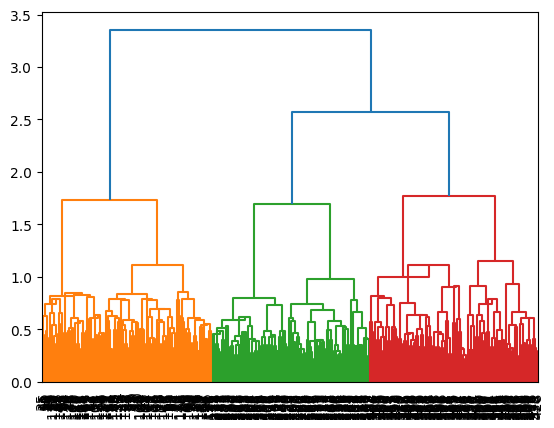

In [34]:
#Draw the tree
plt.figure()
hcluster.dendrogram(
    linkage,
    leaf_font_size=10.
)
plt.show()

Then let's compute results by fcluster function. The output is a ndarry, An array of length $n$. $T[i]$ is the flat cluster number to which original observation $i$ belongs.</br>

This function can be used to flatten the dendrogram, obtaining as a result an assignation of the original data points to single clusters.

**Notes:** If we don't add 'plt.show()' at last, then it will output all the results. Including 'plt.show()' allows us to display only the tree plot.

In [35]:
# Compute the results

_pTarget = hcluster.fcluster(
    linkage, 3, 
    criterion='maxclust'
)
_pTarget

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

We also can use parallel coordinates to explain main features after clustering.

In [36]:
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [37]:
data_short = data
data_short['type'] = pTarget
data.columns = fcolums_short + ['type']
data_short.head()

,ID,Ave_WH,Ave_M,Ave_Wks,Ave_DF,type
0,36902,78,521,602,2863,1
1,36903,144,600,521,2245,1
2,36904,95,457,468,1283,1
3,36905,69,596,695,1054,1
4,36906,190,527,691,2051,1


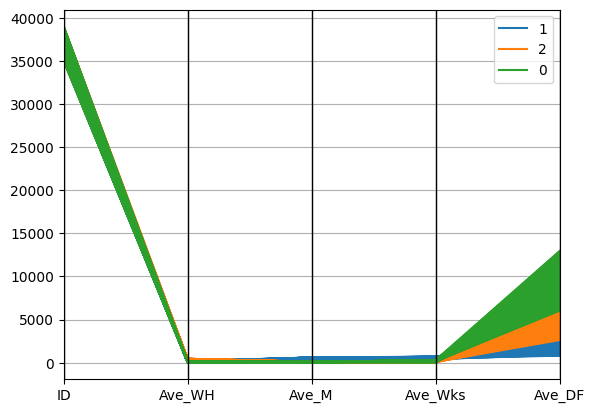

In [38]:
plt.figure()    # blank 
ax = pd.plotting.parallel_coordinates(
    data_short, 'type', 
    color=sns.color_palette(),
)

The parallel coordinates plot illustrates that there are clear boundaries among different clusters. Thus, it's easy to explain the clustering results.

# Summary report

## Objectives
Our objective is to group the data in this dataset into clusters, with the aim of clustering the base stations into different business areas, where we applied the **Hierachical clustering** algorithm. In this study, we will utilize the PCA to reduce dimensions and then clustering by Hierachical clustering algorithm.


## Organisation of the data
The data set contains a total of 430 samples and 5 attributes/variables/features: 'Base station ID', 'Average stay length during working hours on weekdays', 'Average stay length in early morning','Average stay length on weekends' and 'Average daily footfall'. For convenience, we adopted some abbreviates for title in latter analysis.

## Exploratory data analysis：
In the course of the exploratory data analysis, we find that the four variables do not have a linear relationship, so there is no need to remove collinear features.

##  Model specification
The analysis objective suggested a clustering algorithm that assigns the base stations into different business areas. Here we consider the '**Hierachical clustering**': Firstly, adopt the existing package *'AgglomerativeClusteringpro'* , then draw a dendrogram for this clustering algorithm (See slides p31).In addition, we used PCA before implementing the hierachical clustering. Finally we also use scatter and parallel coordinates plot to check the performance of hierachical clustering algorithm for this dataset.

<!-- ## Model comparison
Given that the Random Forest model is an **ensemble** method of the Decision Tree, we aim to build an optimal Decision Tree model based on the findings of Case Study 1: College Attending Plan Modeled by Decision Tree, and compare its performance with that of the Random Forest model on the testing set. By evaluating the **Accuracy** metric, we observe a slightly higher accuracy for the Random Forest model. Furthermore, upon examining the **Confusion Matrices**, we find that the Random Forest model outperforms the Decision Tree method in reducing the type 2 error rate, albeit at the cost of a slight increase in the type 1 error rate. We also observe that the **ROC curve** of the Random Forest model consistently outperforms that of the Decision Tree model, with a correspondingly higher **AUC score**. Overall, we conclude that the **Random Forest model exhibits superior classification performance compared to the Decision Tree model**, which further underscores the utility of ensemble methods in machine learning. -->